# Comparative Analysis of Machine Learning Techniques in Stroke Prediction
## Assessing Patient Risk Factors with Naive Bayes, Neural Networks, and Random Forests
### Karin Raath, Project 2
### December 2023

In [40]:
from IPython.display import Image
from IPython.display import HTML

video_file = 'Hemorrhagic_Stroke.mp4'

# Embed the video
HTML(f"""
    <video width="800" height="450" controls autoplay loop>
        <source src="{video_file}" type="video/mp4">
    </video>
""")

Video obtained from [Nucleus](https://www.youtube.com/watch?v=pcmrgwNCPwM&t=191s) (Stroke | nucleus health 2011)

## Analysis of Stroke Dataset
This project focuses on analyzing of the Stroke Prediction Dataset obtained from [Kaggle](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?rvi=1), which comprises 5110 observations across 12 attributes.

The analysis employs three distinct machine learning techniques: Naive Bayes, Neural Networks, and Random Forests. To ensure the robustness of these models, 10-fold cross-validation is utilized, which helps in highlighting the bias-variance tradeoff and providing insights into the models' generalization capabilities.

The project includes detailed visualizations using seaborn pair plots, pie plots, Receiver Operating Characteristic (ROC) curves, and partial dependent plots. These visualizations aid in a comprehensive understanding of the dataset's structure and the models' performance. Additionally, the accuracy of the models is meticulously measured and compared.

A significant aspect of this analysis is the use of both under and over-sampling techniques to address class imbalances in the dataset. The effectiveness of these sampling methods is compared to understand their impact on model performance.

Predictive models incorporate a variety of clinical variables such as sex, age, hypertension, heart disease, glucose levels, body mass index, and smoking status. Moreover, non-clinical factors like patients' residence (rural or urban) and employment status are analyzed to determine their influence as potential risk factors.

The ultimate goal of this project is to apply advanced machine learning techniques for a thorough understanding of the dataset, evaluating model performance, and identifying key predictive features that contribute to the likelihood of a patient experiencing a future cerebrovascular accident (stroke). The comparative assessment of the three machine learning techniques—Naive Bayes, Neural Networks, and Random Forests—will provide valuable insights into their relative effectiveness in stroke prediction.


## Variable Explanation Original Data

- **id:** Unique patient identifier 
- **gender:** Gender of the patient - "Male", "Female" or "Other". 
- **age:** Age of the patient.
- **hypertension:** Indicates if the patient has hypertension (1 = Hypertension, 0 = No Hypertension). 
- **heart_disease:** Indicates if the patient has heart disease (1 = Heart Disease, 0 = No Heart Disease).
- **ever_married:**  Indicates if the patient was ever married ("Yes" = Married, "No" = Never Married).
- **work_type:** Type of work the patient does - "children", "Govt_job", "Never_worked", "Private", or "Self-employed".
- **Residence_type:** Type of residence where the patient lives - "Rural" or "Urban".
- **avg_glucose_level:** The patient's average blood glucose level.
- **bmi:** Patient's body mass index.
- **smoking_status:** Patient's smoking status - "formerly smoked", "never smoked", "smokes", or "Unknown".
- **stroke:** Indicates if the patient had a stroke (1 = Stroke, 0 = No Stroke). 

(Obtained from [Kaggle](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?rvi=1))

## Variable Explanation Transformed Data

- **ID:** Unique patient identifier, omitted for this project.
- **Sex:** Replaces 'gender' for suitability in this study. 'Other' category is omitted. Encoded as 1 for Male and 0 for Female (int). 
- **Age:** Age of the patient in years, represented as an integer (int).
- **Hypertension:** Indicates the presence of hypertension (1 = Hypertension, 0 = No Hypertension) (int). 
- **HeartDisease:**  Indicates the presence of heart disease (1 = Heart Disease, 0 = No Heart Disease) (int).
- **Married:**  Indicates marital status (1 = Married, 0 = Never Married) (int).
- **Work:** Type of work the patient does, categories include "children", "Govt_job", "Never_worked", "Private", or "Self-employed" (object).
- **Residence:** Type of residence (1 = Rural, 0 = Urban) (int).
- **Glucose:** The patient's average blood glucose level, converted to an integer (int).
- **BMI:** Patient's body mass index, converted to an integer (int).
- **Smoker:** Patient's smoking status with categories "formerly smoked", "never smoked", "smokes", or "Unknown" (object).
- **Stroke:** Indicates if the patient had a stroke (1 = Stroke, 0 = No Stroke) (int).

## Import Libraries Needed

In [188]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import requests
import seaborn as sns
import statsmodels.api as sm
import tensorflow as tf
import warnings
from IPython.display import Image
from IPython.display import HTML
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB, CategoricalNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
warnings.filterwarnings('ignore')

## Reading Data 

In [39]:
df = pd.read_csv('stroke.csv')

## The Stroke Prediction Data Set

After downloading all the necessary libraries to visualize and manipulate the data, we use `df.head()` and `df.info()` to better understand the data.

- `df.head()` allows us to glimpse the initial rows of the dataset, showcasing the columns and the types of values in each column.

- `df.info()` provides essential information, such as the number of variables and instances. In this dataset, we have 14 variables and 1025 instances.

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Data Wrangling, Mungling, and Cleaning

- **Rename Columns:** Variable names will be modified to more meaningful and descriptive names.
- **Handle Invalid and Zero Values:** Invalid and zero values will be removed from the dataset. Particularly, zero values in variables like Sex, Age, Marital Status, Work Type, Residence Location, Glucose Level, Body Mass Index, and Smoking Status, which are invalid, will be treated as missing and removed.
- **Handling Float Values:** Float values will be retained for accuracy, and continuous values will be standardized later in the project.
- **Create Subset of Stroke Patients:** The analysis will focus on instances where Stroke = 1, representing patients who experienced a stroke, for more targeted insights.
- **Change Sex to Integer:** The category 'Other' in the 'Sex' variable will be removed. For predictive purposes, 'Male' will be mapped to 1 and 'Female' to 0.
- **Change Residence from Categorical to Integer:** The 'Residence' variable will be converted to integers, with 'Urban' mapped to 1 and 'Rural' to 0.
- **Change Married from Categorical to Integer:** Marital status will be mapped as 1 for married patients and 0 for unmarried patients.
- **One-Hot Encode 'Work' and 'Smoker' Columns:** These columns will be transformed into a numerical format using one-hot encoding, creating new binary columns for each category.

In [41]:
# Rename columns for clarity
df.columns = ['ID','Sex','Age','Hypertension','HeartDisease','Married', 'Work', 'Residence',
              'Glucose','BMI','Smoker', 'Stroke']

# Remove Zeros and Null values for columns that can't have zero values
NoZeroColumns = ['Sex', 'Age', 'Married', 'Work', 'Residence', 'Glucose', 'BMI', 'Smoker']
df = df.replace({col: 0 for col in NoZeroColumns}, pd.NA).dropna(subset=NoZeroColumns)

# Create subset of patients who had a stroke
Stroke_df = df[df["Stroke"] > 0]

# Remove "Other" from "Sex" and change to integer (Male = 1 and Female = 0)
df = df[df['Sex'].isin(['Male', 'Female'])]
sex_mapping = {'Male': 1, 'Female': 0}
df['Sex'] = df['Sex'].map(sex_mapping)

# Change Residence from categorical to integer
residence_mapping = {'Rural': 0, 'Urban': 1}
df['Residence'] = df['Residence'].map(residence_mapping)

# Change Married from categorical to integer
married_mapping = {'Yes': 1, 'No': 0}
df['Married'] = df['Married'].map(married_mapping)

# Use One-Hot encoding to change categorical attribute Work to numerical values
df_encoded = pd.get_dummies(df, columns=['Smoker', 'Work'])

In [42]:
# Check if any NaN in the dataset
df.isna().any().any()  

False

In [43]:
# Remove Smoker from df because of unknown values
df = df[['Sex','Age','Hypertension','HeartDisease','Married', 'Work', 'Residence',
              'Glucose','BMI', 'Stroke']]

In [44]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      4908 non-null   int64  
 1   Sex                     4908 non-null   int64  
 2   Age                     4908 non-null   float64
 3   Hypertension            4908 non-null   int64  
 4   HeartDisease            4908 non-null   int64  
 5   Married                 4908 non-null   int64  
 6   Residence               4908 non-null   int64  
 7   Glucose                 4908 non-null   float64
 8   BMI                     4908 non-null   float64
 9   Stroke                  4908 non-null   int64  
 10  Smoker_Unknown          4908 non-null   uint8  
 11  Smoker_formerly smoked  4908 non-null   uint8  
 12  Smoker_never smoked     4908 non-null   uint8  
 13  Smoker_smokes           4908 non-null   uint8  
 14  Work_Govt_job           4908 non-null   

In [45]:
# Create a df without Smoker because of the "Unknown" Smoker Category
df_without_smoker_id = df_encoded[['Sex','Age','Hypertension','HeartDisease','Married', 'Residence',
              'Glucose','BMI', 'Stroke']]

In [46]:
df_without_smoker_id.head()

,Sex,Age,Hypertension,HeartDisease,Married,Residence,Glucose,BMI,Stroke
0,1,67.0,0,1,1,1,228.69,36.6,1
2,1,80.0,0,1,1,0,105.92,32.5,1
3,0,49.0,0,0,1,1,171.23,34.4,1
4,0,79.0,1,0,1,0,174.12,24.0,1
5,1,81.0,0,0,1,1,186.21,29.0,1


In [47]:
df_without_smoker_id.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sex           4908 non-null   int64  
 1   Age           4908 non-null   float64
 2   Hypertension  4908 non-null   int64  
 3   HeartDisease  4908 non-null   int64  
 4   Married       4908 non-null   int64  
 5   Residence     4908 non-null   int64  
 6   Glucose       4908 non-null   float64
 7   BMI           4908 non-null   float64
 8   Stroke        4908 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 383.4 KB


In [48]:
df_encoded.head()

,ID,Sex,Age,Hypertension,HeartDisease,Married,Residence,Glucose,BMI,Stroke,Smoker_Unknown,Smoker_formerly smoked,Smoker_never smoked,Smoker_smokes,Work_Govt_job,Work_Never_worked,Work_Private,Work_Self-employed,Work_children
0,9046,1,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,0,0,1,0,0
2,31112,1,80.0,0,1,1,0,105.92,32.5,1,0,0,1,0,0,0,1,0,0
3,60182,0,49.0,0,0,1,1,171.23,34.4,1,0,0,0,1,0,0,1,0,0
4,1665,0,79.0,1,0,1,0,174.12,24.0,1,0,0,1,0,0,0,0,1,0
5,56669,1,81.0,0,0,1,1,186.21,29.0,1,0,1,0,0,0,0,1,0,0


## Further Data Cleaning Considerations

- **Handling the 'Unknown' Category in 'Smoker' Data:** Considering the substantial number of entries categorized as 'Unknown' (1,483) in the 'Smoker' attribute, a dual analysis approach will be used. This includes conducting analyses both with and without the 'Smoker' attribute to evaluate the impact of the 'Unknown' category on model performance.

- **Rename Attributes after One-Hot Encoding:** The newly created attributes from One-Hot encoding, such as 'Smoker_Unknown', 'Smoker_formerly smoked', 'Smoker_never smoked', 'Smoker_smokes', and various 'Work' categories, will be renamed for clarity. They will be changed to 'Smoker_Unknown', 'Smoker_Formerly', 'Smoker_Never', 'Smoker_Current', 'Work_Govt', 'Work_Never', 'Work_Private', 'Work_SelfEmployed', and 'Work_Children'.

- **Standardize Continuous Variables:** The continuous variables 'Age', 'Glucose', and 'BMI' will be standardized using the StandardScaler. This process involves scaling these variables to have a mean of zero and a standard deviation of one, ensuring uniformity and aiding in effective model training.

In [49]:
# Count Number of Unknown Smoker entries
unknown_smoker_count = df_encoded['Smoker_Unknown'].sum()

print("Number of 'Unknown' entries in the Smoker column:", unknown_smoker_count)  

Number of 'Unknown' entries in the Smoker column: 1483


In [50]:
# Rename New Columns from One-Hot encoding
df_encoded.columns = ['ID', 'Sex', 'Age', 'Hypertension', 'HeartDisease', 'Married', 'Residence',
    'Glucose', 'BMI', 'Stroke', 'Smoker_Unknown', 'Smoker_Formerly', 'Smoker_Never', 
    'Smoker_Current', 'Work_Govt', 'Work_Never', 'Work_Private', 'Work_SelfEmployed', 
    'Work_Children']

In [51]:
df_encoded.head()

,ID,Sex,Age,Hypertension,HeartDisease,Married,Residence,Glucose,BMI,Stroke,Smoker_Unknown,Smoker_Formerly,Smoker_Never,Smoker_Current,Work_Govt,Work_Never,Work_Private,Work_SelfEmployed,Work_Children
0,9046,1,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,0,0,1,0,0
2,31112,1,80.0,0,1,1,0,105.92,32.5,1,0,0,1,0,0,0,1,0,0
3,60182,0,49.0,0,0,1,1,171.23,34.4,1,0,0,0,1,0,0,1,0,0
4,1665,0,79.0,1,0,1,0,174.12,24.0,1,0,0,1,0,0,0,0,1,0
5,56669,1,81.0,0,0,1,1,186.21,29.0,1,0,1,0,0,0,0,1,0,0


## Data Visualization: Pie Plot
This pie plot provides a visual representation of the proportion of patients in the dataset who experienced a stroke compared to those who did not. The data reveals that a significant majority, 95.74%, of the patients did not have a stroke, while only 4.26% had experienced a stroke. This visualization highlights the distribution of stroke occurrences within the patient population, offering an immediate visual understanding of the prevalence of strokes in the dataset.

In [52]:
labels = ['No Stroke','Stroke']
values = df_encoded['Stroke'].value_counts()
colors = ['blue', 'purple']
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.35)])
fig.update_traces(hoverinfo='label+value',textfont_size=15,marker=dict(colors=colors))
fig.update_layout(annotations=[dict(text='Stroke', font_size=15, showarrow=False)])
fig.show()

In [53]:
# Confirm that graph output is correct
print(df['Stroke'].value_counts())

0    4699
1     209
Name: Stroke, dtype: int64


In [54]:
# Balance the orginal data (before encoding) for use in seaborn plotting
# Create two separate dataframes for each class
df_majority_raw = df[df['Stroke'] == 0]
df_minority_raw = df[df['Stroke'] == 1]

# Over-sample the minority class
df_minority_raw_oversampled = df_minority_raw.sample(n=len(df_majority_raw), replace=True)

# Combine the majority class with the over-sampled minority class
df_balanced_raw = pd.concat([df_majority_raw, df_minority_raw_oversampled])

# Shuffle the dataset to avoid any ordering bias
df_balanced_raw = df_balanced_raw.sample(frac=1).reset_index(drop=True)

## Data Visualization and Analysis: Pairplot
This section employs a seaborn pairplot to analyze key attributes of our dataset: Sex, Age, Hypertension, Married, Residence, Glucose, and Body Mass Index (BMI). A pairplot visualizes pairwise relationships in a dataset, offering preliminary insights into potential correlations without detailed statistical analysis. This aligns with the broader objective of developing machine learning models for stroke prediction.

The diagonal graphs in the pairplot typically show distributions for individual variables, often as probability density or kernel density estimates. Key observations from our visualization include:

- **Sex and Residence:** The dataset presents a varied gender distribution, with a marginally higher representation of females. The pairplot suggests no clear correlation between sex or residence (urban or rural) and stroke risk, indicating that gender and living location may not be significant predictors in this context.

- **Age:** The pairplot reveals age as a potentially significant stroke risk factor. Stroke risk is notably lower in younger individuals and increases with age, particularly for those over 50.

- **Hypertension and Heart Disease:** Both hypertension and heart disease are associated with a higher stroke risk. Marital status also shows a higher proportion of stroke cases among married individuals, possibly due to the correlation with older age.

- **Glucose and BMI:** Higher glucose levels and BMI appear to be associated with an increased stroke risk. While these observations are preliminary, they highlight these factors as potential risk contributors.

The pairplot provides valuable initial insights into how different attributes might relate to stroke risk. However, it is important to remember that these are initial observations and more detailed statistical analysis is needed to draw definitive conclusions.

In [55]:
df3 = df_balanced_raw[['Sex','Age','Hypertension', 'HeartDisease','Married', 
          'Residence','Glucose', 'BMI','Stroke']]
df3.head()

,Sex,Age,Hypertension,HeartDisease,Married,Residence,Glucose,BMI,Stroke
0,1,54.0,1,0,1,0,100.12,32.3,0
1,0,55.0,0,0,1,0,109.59,26.2,0
2,1,49.0,0,0,0,0,104.86,31.9,1
3,1,60.0,0,1,1,1,91.92,35.9,1
4,0,68.0,0,0,1,1,222.58,37.4,0


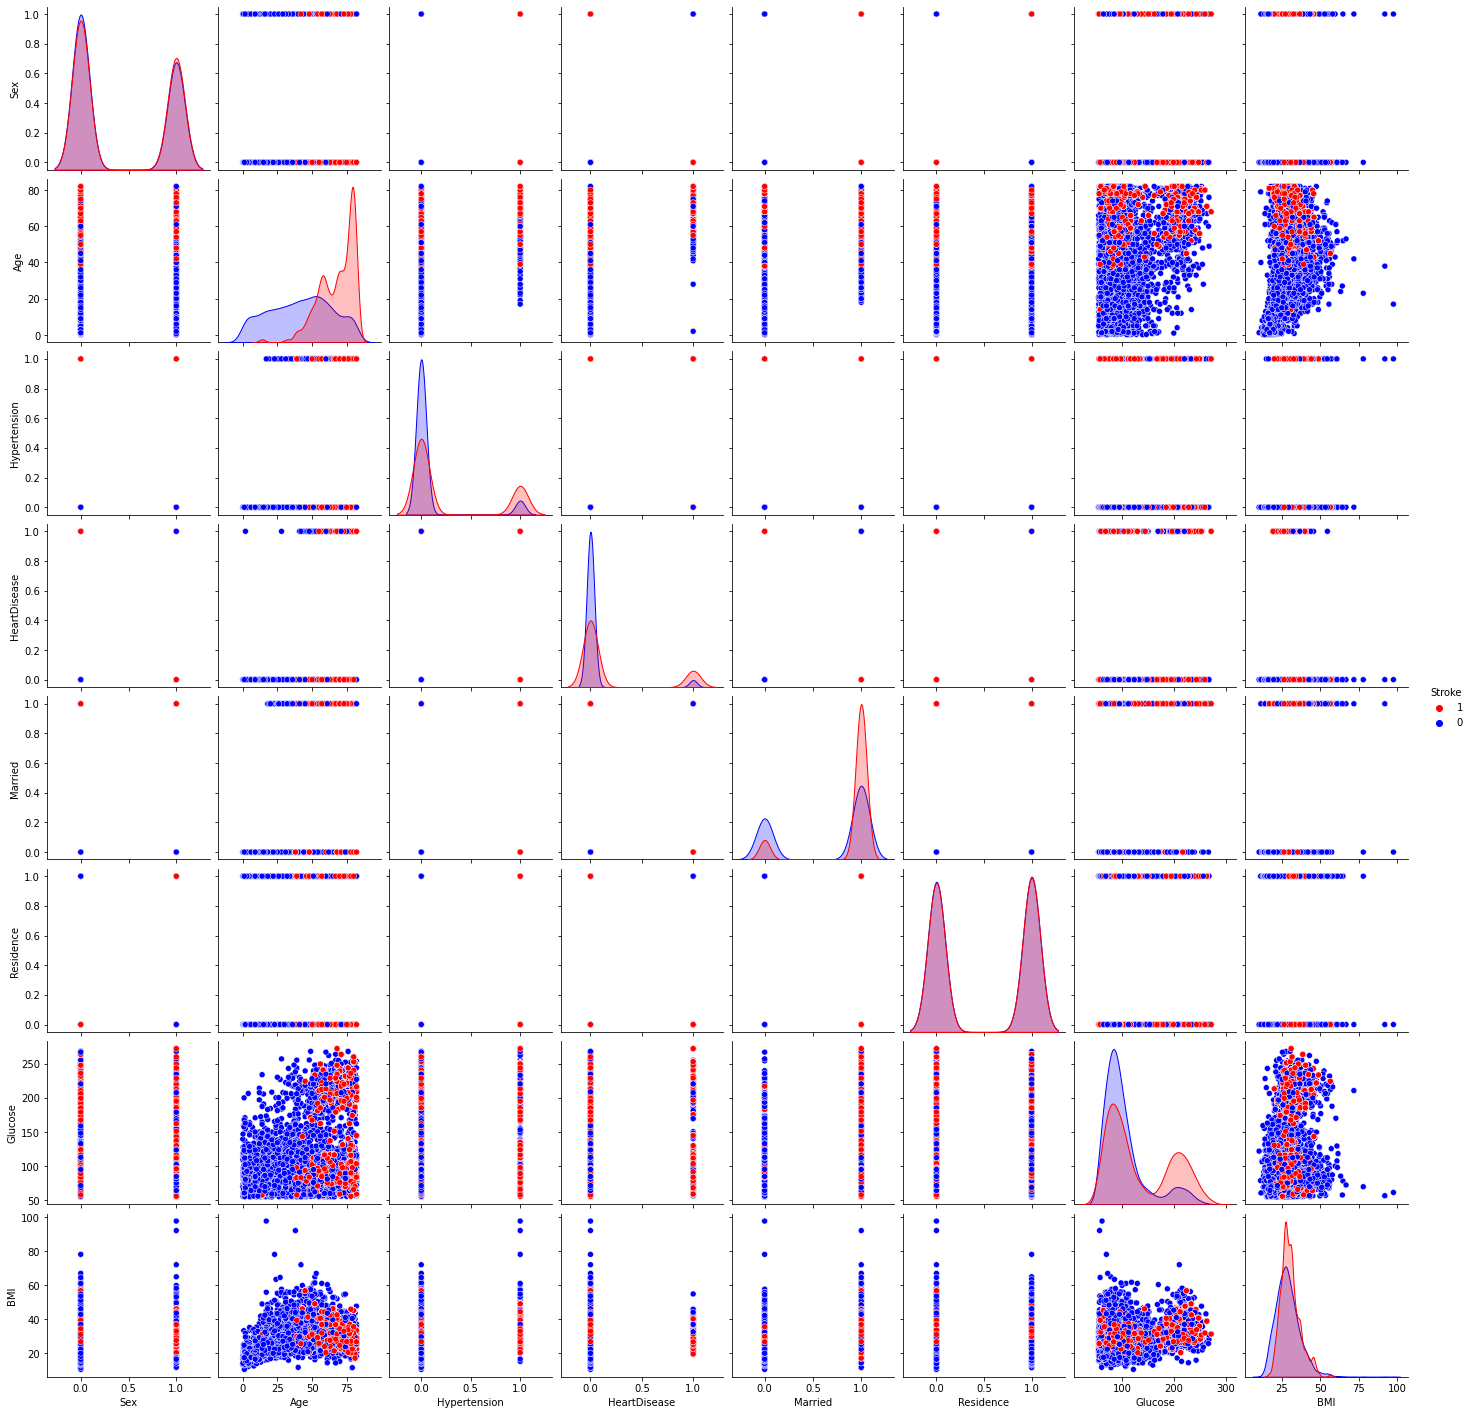

In [21]:
# Display balanced raw data (before encoding), exluding ID column
df3['Stroke'] = df3['Stroke'].astype(str)
palette = {'0': 'blue', '1': 'red'}
sns.pairplot(df3, hue='Stroke', palette=palette)
plt.show()

## Balance and Prepare Data for Machine Learning
To enhance the performance of our machine learning models, several preparatory steps will be undertaken. Addressing the class imbalance in our dataset, particularly for stroke cases, involves using a manual oversampling technique. Separate dataframes for the majority class (non-stroke cases) and the minority class (stroke cases) are created. The minority class is oversampled by sampling with replacement to match the size of the majority class, and the combined dataset is then shuffled to prevent any ordering bias.

In addition to balancing the dataset, features such as 'Age,' 'Glucose,' and 'BMI' will be standardized. This standardization normalizes the scale of these variables, aiding in more effective model training. The 'Smoker' column will be removed due to its large subset of unknown values, which could introduce bias or impact the predictive accuracy of the models. Similarly, the 'Work' and 'ID' columns will be removed due to their limited relevance and predictive power in this specific analysis. These steps are essential to prepare the data optimally for machine learning modeling, ensuring that the models are trained on a dataset that is both balanced and focused on the most impactful features.

In [56]:
# Create two separate dataframes for each class
df_majority = df_encoded[df_encoded['Stroke'] == 0]
df_minority = df_encoded[df_encoded['Stroke'] == 1]

# Over-sample the minority class
df_minority_oversampled = df_minority.sample(n=len(df_majority), replace=True)

# Combine the majority class with the over-sampled minority class
df_balanced = pd.concat([df_majority, df_minority_oversampled])

# Shuffle the dataset to avoid any ordering bias
df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)

In [57]:
class_counts = df_balanced['Stroke'].value_counts()
print(class_counts)

0    4699
1    4699
Name: Stroke, dtype: int64


In [58]:
labels = ['No Stroke','Stroke']
values = df_balanced['Stroke'].value_counts()
colors = ['blue', 'purple']
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.35)])
fig.update_traces(hoverinfo='label+value',textfont_size=15,marker=dict(colors=colors))
fig.update_layout(annotations=[dict(text='Stroke', font_size=15, showarrow=False)])
fig.show()

In [59]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9398 entries, 0 to 9397
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 9398 non-null   int64  
 1   Sex                9398 non-null   int64  
 2   Age                9398 non-null   float64
 3   Hypertension       9398 non-null   int64  
 4   HeartDisease       9398 non-null   int64  
 5   Married            9398 non-null   int64  
 6   Residence          9398 non-null   int64  
 7   Glucose            9398 non-null   float64
 8   BMI                9398 non-null   float64
 9   Stroke             9398 non-null   int64  
 10  Smoker_Unknown     9398 non-null   uint8  
 11  Smoker_Formerly    9398 non-null   uint8  
 12  Smoker_Never       9398 non-null   uint8  
 13  Smoker_Current     9398 non-null   uint8  
 14  Work_Govt          9398 non-null   uint8  
 15  Work_Never         9398 non-null   uint8  
 16  Work_Private       9398 

In [60]:
# Standarize 'Age', 'Glucose', and 'BMI'
scaler = StandardScaler()
columns_to_scale = ['Age', 'Glucose', 'BMI']
df_balanced[columns_to_scale] = scaler.fit_transform(df_balanced[columns_to_scale])
df_balanced.head()

,ID,Sex,Age,Hypertension,HeartDisease,Married,Residence,Glucose,BMI,Stroke,Smoker_Unknown,Smoker_Formerly,Smoker_Never,Smoker_Current,Work_Govt,Work_Never,Work_Private,Work_SelfEmployed,Work_Children
0,68023,1,1.087869,0,0,1,0,-0.832391,-0.168275,1,0,0,1,0,0,0,1,0,0
1,12689,0,0.368349,0,0,1,0,1.545857,1.746745,1,0,1,0,0,1,0,0,0,0
2,40670,0,-1.565361,0,0,0,0,-0.404873,0.622712,0,0,0,1,0,0,0,1,0,0
3,18032,1,0.323379,0,1,1,0,-0.511752,-0.529076,0,0,0,0,1,0,0,1,0,0
4,2543,0,-1.610331,0,0,1,0,-0.515160,-1.139662,0,0,0,1,0,0,0,1,0,0


In [61]:
#df_reduced_balanced = df_balanced.drop(df_balanced.columns[10:19], axis = 1)
df_reduced_balanced = df_balanced.drop(columns=['ID'] + list(df_balanced.columns[10:19]))
df_reduced_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9398 entries, 0 to 9397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sex           9398 non-null   int64  
 1   Age           9398 non-null   float64
 2   Hypertension  9398 non-null   int64  
 3   HeartDisease  9398 non-null   int64  
 4   Married       9398 non-null   int64  
 5   Residence     9398 non-null   int64  
 6   Glucose       9398 non-null   float64
 7   BMI           9398 non-null   float64
 8   Stroke        9398 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 660.9 KB


In [62]:
df_reduced_balanced.head()

,Sex,Age,Hypertension,HeartDisease,Married,Residence,Glucose,BMI,Stroke
0,1,1.087869,0,0,1,0,-0.832391,-0.168275,1
1,0,0.368349,0,0,1,0,1.545857,1.746745,1
2,0,-1.565361,0,0,0,0,-0.404873,0.622712,0
3,1,0.323379,0,1,1,0,-0.511752,-0.529076,0
4,0,-1.610331,0,0,1,0,-0.515160,-1.139662,0


## Naive Bayes

In the stroke prediction dataset, the Gaussian Naive Bayes classifier will be used to estimate the probability of a patient experiencing a stroke based on various attributes. This classifier is particularly suitable for datasets with continuous variables, as it assumes these variables follow a Gaussian distribution for each class. Despite its assumption of conditional independence among attributes, which might not perfectly mirror real-world complexities, this simplification enables effective and computationally efficient predictions in many scenarios.

The dataset will be divided into training and testing sets in a 70:30 ratio, possibly using stratified sampling to ensure representative subsets. The training set will be used to familiarize the Gaussian Naive Bayes model with the data's patterns and relationships. This involves calculating the likelihoods and parameters of the Gaussian distribution for different attribute values, conditional on the presence or absence of a stroke.

Post-training, the model's predictive performance will be assessed using the testing set. Evaluation metrics such as accuracy, precision, and recall will be employed. Recall, in particular, is a crucial metric in medical diagnoses and is calculated as follows:

$$ \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} $$

This formula measures the model’s ability to correctly identify all actual cases of stroke (True Positives) out of all the cases that are actually strokes (True Positives plus False Negatives). A high recall is essential in this context to ensure that the model reliably identifies most stroke cases, minimizing the risk of overlooking patients who are at risk. The application of learned probabilities and Gaussian parameters to new, unseen data will help determine the Gaussian Naive Bayes model's effectiveness in predicting strokes, considering the specific attributes and distribution of the dataset.

In [63]:
# Randomize data
dfr = df_reduced_balanced.sample(frac=1)

# Set a random seed for reproducibility
random_seed = 2
np.random.seed(random_seed)

# Create a Gaussian Naive Bayes classifier with Laplace smoothing
alpha = 0.1
naive_bayes_classifier = GaussianNB(var_smoothing=alpha)

# Split data
trainsize = round(len(dfr) * 0.7)
trainSet = dfr[:trainsize].reset_index(drop = True)
testSet = dfr[trainsize:].reset_index(drop = True)

print(trainSet.shape)
print(testSet.shape)

(6579, 9)
(2819, 9)


In [64]:
print(type(trainSet))
trainSet.head(6)

<class 'pandas.core.frame.DataFrame'>


,Sex,Age,Hypertension,HeartDisease,Married,Residence,Glucose,BMI,Stroke
0,1,1.132839,1,1,1,1,1.006797,0.261911,1
1,1,1.132839,0,0,1,0,2.519250,0.289665,1
2,1,-1.385481,1,0,1,0,-0.690722,-0.196029,0
3,0,-0.216261,0,0,1,0,-0.304629,0.248034,1
4,1,-1.745241,0,0,0,0,-0.515698,-0.431937,0
5,1,0.233439,0,0,1,0,-1.013871,0.150895,0


In [65]:
# 1 Stroke, 0 no stroke
trainSet['Stroke'].value_counts(normalize = True)

0    0.502964
1    0.497036
Name: Stroke, dtype: float64

In [66]:
# Creating Naive Bayes model
trainX = trainSet.iloc[:,:-1]
trainy = trainSet['Stroke']
colnames = trainX.columns
trainX.head()
trainy.head()

0    1
1    1
2    0
3    1
4    0
Name: Stroke, dtype: int64

In [67]:
testSet.head()

,Sex,Age,Hypertension,HeartDisease,Married,Residence,Glucose,BMI,Stroke
0,0,-0.216261,0,0,1,0,-0.304629,0.248034,1
1,0,-0.531051,0,0,0,0,-0.479653,-0.959261,0
2,0,0.548229,0,0,1,0,-0.156504,-0.653968,0
3,0,1.087869,0,0,0,0,-0.542059,-0.931507,1
4,0,1.042899,0,0,1,0,-0.173540,0.164772,1


In [68]:
# Encoding and Training
le = LabelEncoder()
trainBrnli = le.fit_transform(trainy)

In [69]:
# Mixed Variables
enc = OrdinalEncoder()
trainX = enc.fit_transform(trainX)
trainX = pd.DataFrame(trainX, columns = colnames)
trainX.head()

,Sex,Age,Hypertension,HeartDisease,Married,Residence,Glucose,BMI
0,1.0,101.0,1.0,1.0,1.0,1.0,2559.0,180.0
1,1.0,101.0,0.0,0.0,1.0,0.0,2945.0,182.0
2,1.0,45.0,1.0,0.0,1.0,0.0,889.0,147.0
3,0.0,71.0,0.0,0.0,1.0,0.0,1789.0,179.0
4,1.0,37.0,0.0,0.0,0.0,0.0,1330.0,130.0


In [70]:
# Create Model and Fit
model = CategoricalNB()
model.fit(trainX, trainBrnli)

CategoricalNB()

In [71]:
# Predict
yhattrain = model.predict(trainX)

## Confusion Matrix Analysis
The table presents the results of the model's predictions compared to the actual outcomes, categorized by the target variable. Rows represent the predicted values (0 for no stroke, 1 for a stroke), while columns depict the actual outcomes (0 for no stroke, 1 for stroke). Instances where the predicted and actual values align diagonally signify accurate predictions, while off-diagonal entries indicate misclassifications. In this specific case, the model correctly predicted 2827 instances of no stroke and 3266 instances of stroke. It made 4 false-positive predictions (indicating a stroke when none occurred) and 482 false-negative predictions (failing to predict a stroke when one occurred).

In [72]:
# Confusion Matrix
pd.crosstab(yhattrain, trainy)

Stroke,0,1
row_0,,
0,2827,4
1,482,3266


## Accuracy of Training Data

In [73]:
# Calculate accuracy of training data
accuracy_score(yhattrain, trainBrnli)

0.9261285909712722

## Cross-Validation
The cross-validation, specifically a 10-fold process, was employed to evaluate the model's predictive accuracy across different subsets of the training data. The model exhibited a mean accuracy of around 89%, indicating consistent and robust performance in predicting the target variable. This systematic evaluation across multiple folds ensures a more reliable estimate of the model's generalization ability. It demonstrates the model's stability in handling diverse subsets of the training dataset and minimizes the risk of overfitting, as evidenced by the minimal variation in performance between folds. Additionally, other metrics such as precision, and recall were considered to provide a holistic view of the model's performance. The consistent accuracy across all folds suggests the model is well-tuned and capable of reliable predictions in varied scenarios.

In [75]:
import numpy as np
from sklearn.model_selection import cross_val_score

# Encode the target variable
le = LabelEncoder()
trainBrnli = le.fit_transform(trainSet['Stroke'])

# Encode the categorical features
enc = OrdinalEncoder()
trainX = enc.fit_transform(trainSet.iloc[:, :-1])

# Create and fit the model using cross-validation
model = CategoricalNB()
cv_scores = cross_val_score(model, trainX, trainBrnli, cv=10) 

# Replace NaN values with a specific value (e.g., -1)
cv_scores = np.where(np.isnan(cv_scores), -1, cv_scores)

# Filter and display only non-NaN scores
non_nan_scores = cv_scores[cv_scores != -1]
print("Non-NaN Cross-Validation Scores:", non_nan_scores)

# Calculate and print the mean score for non-NaN values
mean_score = np.mean(non_nan_scores)
print("Mean Accuracy (Excluding NaN):", mean_score)

Non-NaN Cross-Validation Scores: [0.89665653 0.89817629 0.86474164 0.89209726 0.88297872 0.9118541
 0.86930091 0.90121581 0.8934551 ]
Mean Accuracy (Excluding NaN): 0.8900529306144773


In [76]:
# Testing
enc = OrdinalEncoder()
le = LabelEncoder()
model = CategoricalNB()
model.fit(trainX, trainBrnli)
testX = testSet.iloc[:,:-1]
testy = testSet['Stroke']
testX = enc.fit_transform(testX)
testX = pd.DataFrame(testX, columns = colnames)
testBrnli = le.fit_transform(testy)
yhattest = model.predict(testX)

## Confusion Matrix on Test Data
The confusion matrix for the test data provides a comprehensive view of the model's performance in terms of accuracy. It reveals how well the model distinguishes between actual stroke cases and non-cases. The matrix quantifies the instances of correct and incorrect predictions, shedding light on the model’s ability to identify strokes and avoid false alarms.

- **True Negatives (1,142 Instances):** These are cases where the model correctly predicted the absence of a stroke.
- **False Positives (746 Instances):** Here, the model incorrectly predicted a stroke when there was none, leading to unnecessary alarm.
- **True Positives (683 Instances):** This quadrant represents the cases where the model correctly identified a stroke, crucial for timely medical intervention.
- **False Negatives (248 Instances):** These are instances where the model failed to identify a stroke that actually occurred, which is particularly concerning in a medical context.

While the model demonstrates a notable ability to identify true cases of strokes and non-strokes, the presence of False Positives and False Negatives highlights areas for improvement. Minimizing these errors is essential, as they represent the critical challenges of medical diagnosis—avoiding misdiagnosis while ensuring no condition goes undetected.

In [80]:
# Confusion Matrix Test
confusionM = confusion_matrix(yhattest, testBrnli)
confusionM

array([[1142,  746],
       [ 248,  683]])

## Accuracy Test Data
Evaluating the test data, the model achieves an accuracy rate of 65%. This figure serves as an indicator of the model's real-world performance, highlighting its ability to make predictions about an individual's likelihood of experiencing a stroke. Leveraging a wide range of attributes, the model demonstrates a capacity to provide valuable insights across diverse cases. Although an accuracy of 65% shows a notable level of predictive ability, it also suggests areas for improvement and the need for further refinement. Nonetheless, this result is encouraging for the model's potential to generalize its predictions to new and unseen instances, thereby enhancing its practical utility in medical settings. Understanding the limitations and strengths of this accuracy rate is crucial for ongoing development and application of the model.

In [81]:
# Accuracy Test
acc = accuracy_score(yhattest, testBrnli)
acc

0.6473926924441291

## Bias-Variance Tradeoff and Model Strategy
The training data accuracy of 89% for our current model, compared to a test data accuracy of 65%, brings into focus the critical concept of the bias-variance tradeoff. In machine learning, bias is associated with oversimplification of models leading to underfitting, while variance refers to the complexity that might cause overfitting. The discrepancy between the training and test accuracies suggests a potential overfitting scenario, where the model excels with familiar data but underperforms with new, unseen data.

Given this situation, instead of further tuning this model, the strategy will shift to exploring other machine learning techniques such as Neural Networks and Random Forests. These techniques might offer different strengths in managing the bias-variance balance and could potentially lead to better generalization on unseen data. In the meantime, additional insights will be sought through examining the false negative rate and the ROC (Receiver Operating Characteristic) curve, as well as plotting predicted stroke probabilities across various patient attributes. This approach will not only provide a deeper understanding of the current model's performance but also set a benchmark for comparing the effectiveness of the alternative models being considered.

The goal is to find the most effective model for stroke prediction, balancing accuracy with the ability to generalize. By exploring these different methodologies, the project aims to identify a model that can more reliably predict strokes across diverse patient profiles, thereby enhancing the overall utility of the predictive analysis.

## False Negative Rate
The False Negative Rate (FNR) for this model is approximately 27%. In the context of stroke prediction, this rate indicates the proportion of actual stroke cases that the model failed to detect. While the model has shown a degree of effectiveness in identifying individuals at risk of a stroke, a 27% FNR suggests that there is a significant number of instances where the model does not identify a stroke that actually occurs.

This rate highlights a crucial aspect of the model’s performance, particularly in a medical setting where missing a stroke diagnosis can have serious consequences. While the model demonstrates a certain level of accuracy, the relatively high FNR underlines the need for further refinement to enhance its reliability. In stroke prediction, where early and accurate detection is vital, reducing the false negative rate is as important as achieving high overall accuracy. This metric will serve as a key point of comparison when evaluating other machine learning techniques like Neural Networks and Random Forests, with the aim to develop a model that more reliably predicts strokes with fewer missed cases.

In [82]:
# False Negative Estimate

FalseNegative = confusionM[1,0] / (confusionM[1,1] + confusionM[1,0])
FalseNegative

0.2663802363050483

## Receiver Operating Characteristic (ROC)
The Receiver Operating Characteristic (ROC) curve is a graphical representation of a model’s ability to distinguish between classes, in this case, patients who did and did not experience a stroke. The Area Under the Curve (AUC) for our model is 76%, which provides insights into its discrimination capability. The AUC measures the trade-off between sensitivity (true positive rate) and specificity (true negative rate) at various thresholds. An AUC of 76% suggests that the model has moderate discriminatory power. It is significantly better than random guessing (which would result in an AUC of 50%), but there is still room for improvement, especially in a medical context where high accuracy is crucial.

This AUC indicates that the model can make reasonably accurate predictions regarding the likelihood of a stroke based on the provided attributes. However, the fact that it is not closer to 100% highlights areas where the model's performance could be enhanced. In the context of stroke prediction, where accurate and early detection is vital, striving for a higher AUC will be an important goal in further model development and comparison with other machine learning techniques.

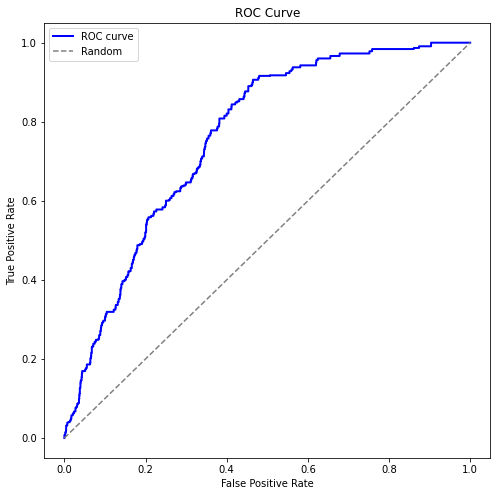

AUC: 0.7615107913669064


In [83]:
# Receiver Operating Characteristic
y_probs = model.predict_proba(testX)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(testBrnli, y_probs)

# Plotting
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Calculate AUC (Area Under the Curve)
auc = roc_auc_score(testBrnli, y_probs)
print(f'AUC: {auc}')

## Exploring Predicted Stroke Probabilities Across Patient Attributes
Scatterplot analyses reveal the predicted probabilities of stroke based on various patient attributes, indicating notable trends in the model's performance. Higher accuracy is observed in predicting strokes for males, with consistent identification of the presence and absence of stroke. In contrast, predictions for females often miss instances of stroke, highlighting a potential area for model improvement.

Age emerges as a significant factor, with the model indicating an increased likelihood of stroke in older individuals. While it reliably predicts the absence of strokes in younger patients, there are occasional oversights in older patients.

Regarding hypertension, the model generally identifies patients without hypertension and no strokes accurately but sometimes erroneously predicts strokes in patients without hypertension. For those with hypertension, the accuracy improves, yet some misclassifications are evident. A similar pattern occurs with heart disease, where the model shows slightly better, but still imperfect, accuracy.

Predictions concerning marital status closely align with actual data, particularly in identifying a higher stroke incidence among married individuals. Urban versus rural residence predictions are reasonable, with a slight tendency for overprediction of strokes among urban residents.

With glucose levels, the model effectively predicts strokes in patients with high glucose levels but sometimes misses stroke cases in patients with lower levels. For Body Mass Index (BMI), the model successfully identifies strokes in patients with high BMI but occasionally fails to detect strokes in those with lower BMI.

These analyses provide insights into how patient attributes influence stroke predictions, revealing strengths in certain areas and areas for improvement, especially in enhancing sensitivity across different demographics and health conditions.

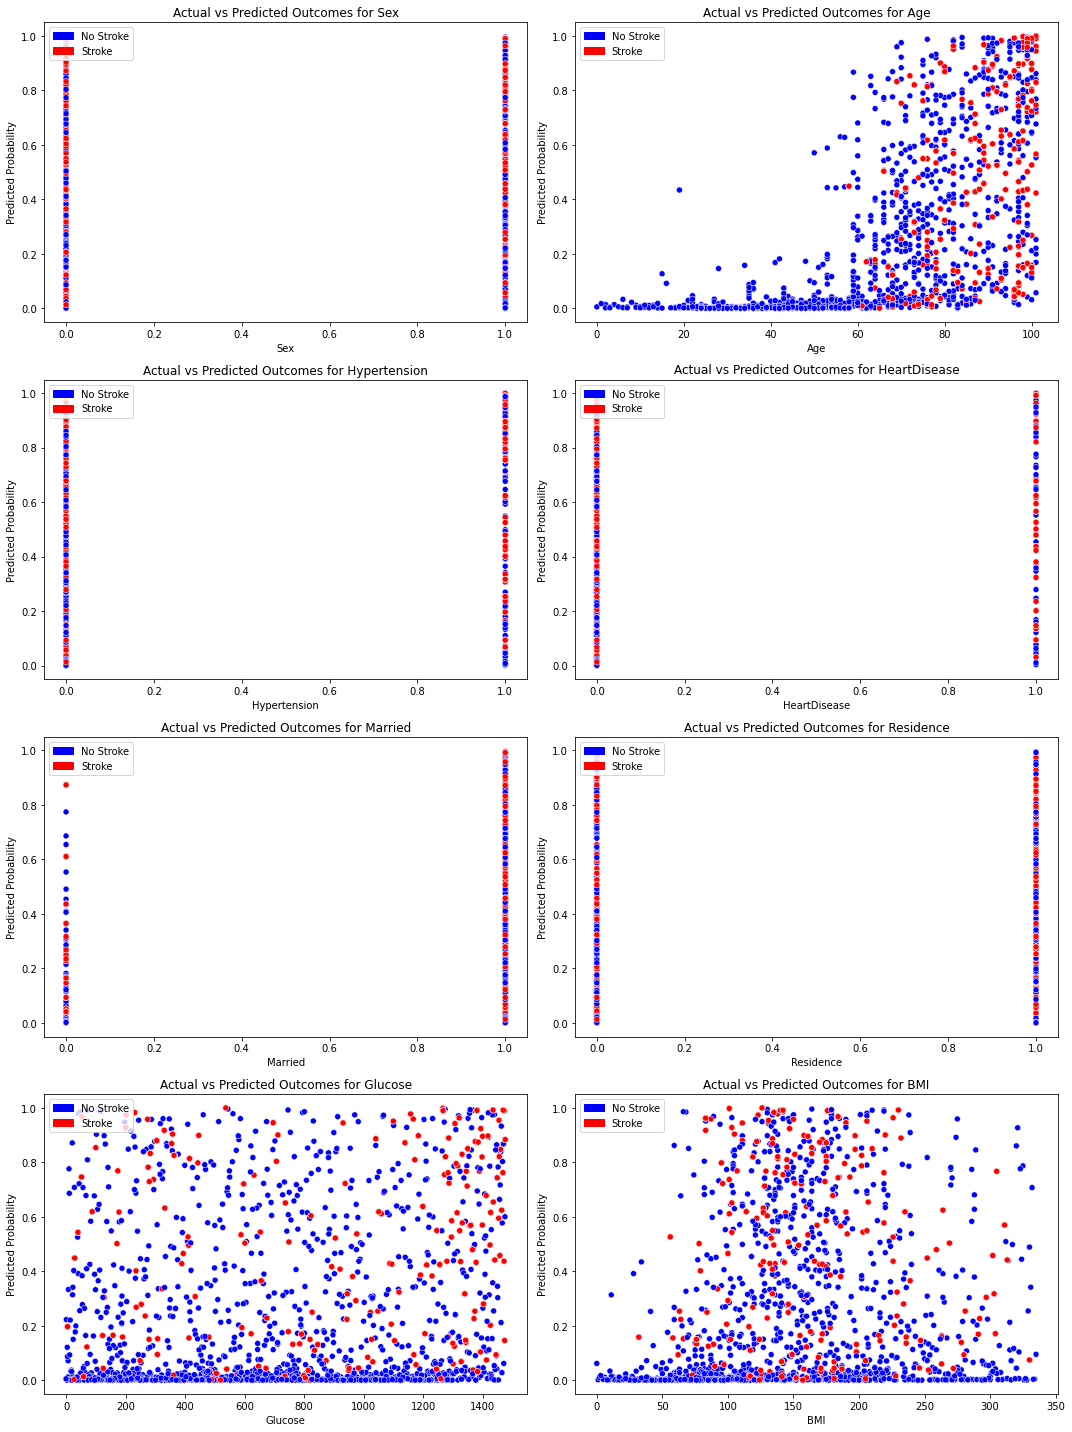

In [84]:
import matplotlib.patches as mpatches
attributes = ['Sex','Age','Hypertension','HeartDisease','Married', 'Residence','Glucose','BMI']

# Subplots
sns.set_palette(['blue', 'red'])
colors = ['blue', 'red']
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()

legend_handles = [mpatches.Patch(color=color, label=label) for color, label in zip(colors, ['No Stroke', 'Stroke'])]

for i, attributes in enumerate(attributes):
    visualization_df = pd.DataFrame({'Actual Outcome': testBrnli, 
                                     'Predicted Probability': y_probs, attributes: testX[attributes]})
    ax = axes[i]
    
    # Plotting
    
    sns.scatterplot(x=attributes, y='Predicted Probability', hue='Actual Outcome', 
                    data=visualization_df, ax=ax, palette=colors)
    ax.legend(handles=legend_handles, loc='upper left')
    #ax.legend(title='Actual Outcome', labels=['Stroke', 'No Stroke'], loc='lower left')
    ax.set_title(f'Actual vs Predicted Outcomes for {attributes}')
    ax.set_xlabel(attributes)
    ax.set_ylabel('Predicted Probability')
    
plt.tight_layout()
plt.show()

## Building Neural Networks for Enhanced Machine Learning Performance
In this section, a Neural Network model was developed and analyzed for stroke prediction, providing a comparative perspective to the previously used Naive Bayes approach. Key findings and performance metrics of the Neural Network are summarized as follows:

- **Model Performance:** The Neural Network achieved an accuracy of 80% on the test data, which marks a significant improvement over the Naive Bayes model's test accuracy of 65%. This indicates a stronger predictive capability in identifying stroke cases.

- **False Negative Rate:** The model exhibited a false negative rate of 15%, which is lower than that of the Naive Bayes model of 27%. This suggests that the Neural Network was more effective in identifying actual stroke cases.

- **Cross-Validation:** Cross-validation yielded a mean accuracy of 78%, reinforcing the model's consistency and robustness across different subsets of the training data.

- **ROC Curve and AUC:** The AUC of 88% obtained from the ROC curve analysis highlights the model's strong discriminative power in distinguishing between positive and negative cases of stroke. This is a significant improvement on the Naive Bayes model with AUC of 76%.

- **Partial Dependence Plots:** These plots provided insights into how different patient attributes affect the likelihood of a stroke. Critical factors like age, hypertension, and heart disease showed a clear correlation with increased stroke risk, whereas attributes like sex and residence showed more complex, non-linear relationships with stroke probability.

This Neural Network model demonstrates a more nuanced understanding of the relationship between various attributes and stroke risk, offering improved performance metrics compared to the Naive Bayes model. The enhanced accuracy and lower false negative rate, in particular, suggest its potential for more reliable stroke predictions.

In [131]:
# Neural Network Machine Learning

# Set seed for reproducability
np.random.seed(123)
tf.random.set_seed(1234)

# Splitting and preparing data
X = df_reduced_balanced.drop(columns=['Stroke'])  # Features (all columns except 'Stroke')
y = df_reduced_balanced['Stroke']  # Target variable

# Split data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Define the number of features and classes
n_features = X_train.shape[1] 
n_classes = 2   

mynet = tf.keras.Sequential([
    layers.Input(shape=(n_features,), name='input_layer'),  
    layers.Dense(units=128, activation='relu', name='hidden1'),
    layers.Dense(units=512, activation = 'tanh', name='hidden2'),
    layers.Dense(units=n_classes, activation='softmax', name='output_layer')
], name='mynet')

# Compile the model
mynet.compile(optimizer='RMSprop',
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

mynet.summary()

Model: "mynet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 128)               1152      
                                                                 
 hidden2 (Dense)             (None, 512)               66048     
                                                                 
 output_layer (Dense)        (None, 2)                 1026      
                                                                 
Total params: 68,226
Trainable params: 68,226
Non-trainable params: 0
_________________________________________________________________


In [132]:
# Train model
history = mynet.fit(
    x=X_train,              
    y=y_train,              
    epochs=5,               
    batch_size=256,         
    validation_split=0.2    
)

# Evaluate model on test data
test_loss, test_accuracy = mynet.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Epoch 1/5
24/24 [==============================] - 1s 10ms/step - loss: 0.4995 - accuracy: 0.7424 - val_loss: 0.5030 - val_accuracy: 0.7513
Epoch 2/5
24/24 [==============================] - 0s 5ms/step - loss: 0.4752 - accuracy: 0.7667 - val_loss: 0.4572 - val_accuracy: 0.7892
Epoch 3/5
24/24 [==============================] - 0s 4ms/step - loss: 0.4648 - accuracy: 0.7709 - val_loss: 0.4521 - val_accuracy: 0.7886
Epoch 4/5
24/24 [==============================] - 0s 4ms/step - loss: 0.4600 - accuracy: 0.7759 - val_loss: 0.4570 - val_accuracy: 0.7773
Epoch 5/5
59/59 [==============================] - 0s 2ms/step - loss: 0.4364 - accuracy: 0.7995
Test Loss: 0.4364, Test Accuracy: 0.7995


In [133]:
# Evaluate the model on test data
test_loss, test_acc = mynet.evaluate(X_test, y_test, verbose=2)

# Print the test accuracy
print("\nTest accuracy:", test_acc)

59/59 - 0s - loss: 0.4364 - accuracy: 0.7995 - 103ms/epoch - 2ms/step

Test accuracy: 0.7994681000709534


In [134]:
# Make predictions on test data
predictions = mynet.predict(X_test)

# Calculate the confusion matrix
confusionM = confusion_matrix(y_test, np.argmax(predictions, axis=1))
print("Confusion Matrix:")
print(confusionM)

Confusion Matrix:
[[700 231]
 [146 803]]


In [135]:
# False Negative Estimate
FalseNegative = confusionM[1,0] / (confusionM[1,1] + confusionM[1,0])
FalseNegative

0.15384615384615385

In [136]:
# Define a function that creates your Keras model
def create_mynet_model():
    mynet = tf.keras.Sequential([
        layers.Input(shape=(n_features,), name='input_layer'),  
        layers.Dense(units=128, activation='relu', name='hidden1'),
        layers.Dense(units=512, activation='tanh', name='hidden2'),
        layers.Dense(units=n_classes, activation='softmax', name='output_layer')
    ], name='mynet')
    
    mynet.compile(optimizer='RMSprop',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return mynet

# Create a KerasClassifier 
model = KerasClassifier(build_fn=create_mynet_model, epochs=5, batch_size=256, verbose=0)

# Perform cross-validation using X_train and y_train
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
mean_score = np.mean(cv_scores)
print("Mean Cross-Validation Accuracy:", mean_score)

Cross-Validation Scores: [0.76130319 0.78191489 0.77593085 0.78642715 0.78642715]
Mean Cross-Validation Accuracy: 0.7784006455174757


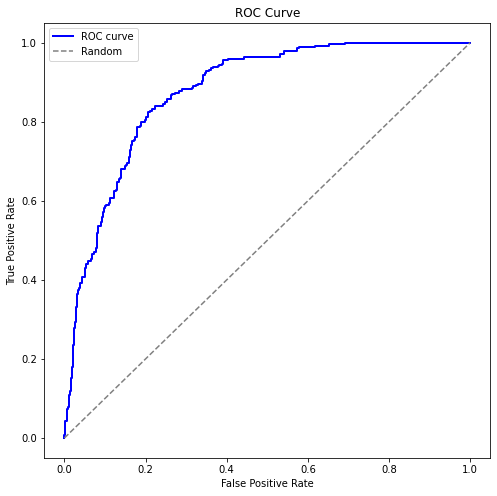

AUC: 0.8758362864861989


In [137]:
# Receiver Operating Characteristic
y_probs = mynet.predict(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plotting
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Calculate AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_probs)
print(f'AUC: {auc}')

## Data Visualization

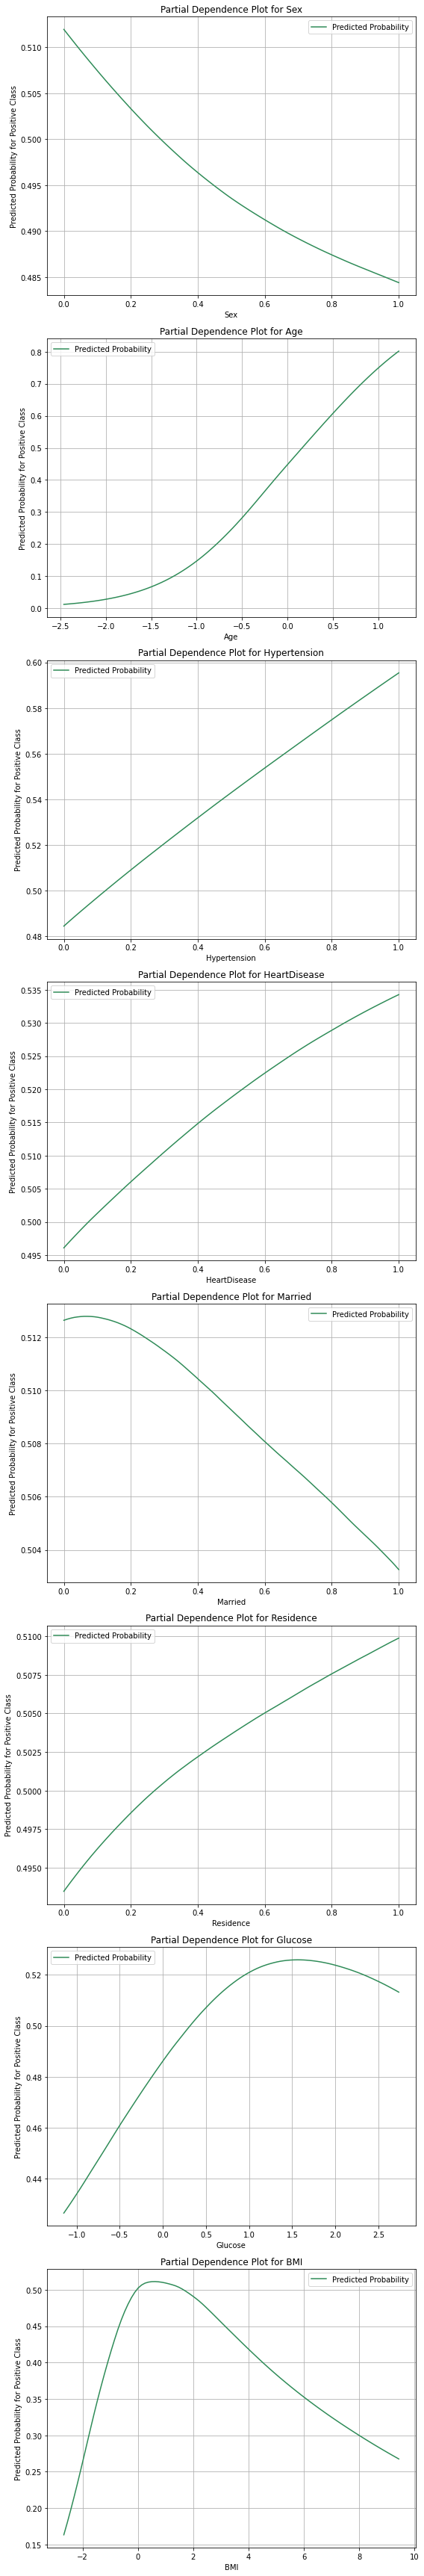

In [92]:
features_to_plot = ['Sex','Age', 'Hypertension', 'HeartDisease', 'Married', 'Residence', 'Glucose', 'BMI']

# Define the range of values for each feature
feature_ranges = {
    'Sex': [0, 1],  # 0 represents 'Female' and 1 represents 'Male'
    'Age':[X['Age'].min(), X['Age'].max()],
    'Hypertension': [0, 1],  # 0 represents 'No' and 1 represents 'Yes'
    'HeartDisease': [0, 1],  # 0 represents 'No' and 1 represents 'Yes'
    'Married': [0, 1],  # 0 represents 'No' and 1 represents 'Yes'
    'Residence': [1, 0],  #  0 represents 'Rural' and 1 represents 'Urban'
    'Glucose': [X['Glucose'].min(), X['Glucose'].max()],  
    'BMI': [X['BMI'].min(), X['BMI'].max()]  
}

# Create subplots for each feature
fig, axes = plt.subplots(len(features_to_plot), 1, figsize=(8, 6 * len(features_to_plot)))

# Iterate over the features and create Partial Dependence Plots
for i, feature_name in enumerate(features_to_plot):
    feature_values = np.linspace(feature_ranges[feature_name][0], feature_ranges[feature_name][1], num=100)
    predicted_probabilities = []

    for value in feature_values:
        input_data = X.copy()
        input_data[feature_name] = value
        predictions = mynet.predict(input_data)
        probability = predictions[:, 1].mean()
        predicted_probabilities.append(probability)

    # Plot 
    axes[i].plot(feature_values, predicted_probabilities, color='seagreen', label='Predicted Probability')
    axes[i].set_xlabel(feature_name)
    axes[i].set_ylabel('Predicted Probability for Positive Class')
    axes[i].set_title(f'Partial Dependence Plot for {feature_name}')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()

## Interpretation of Partial Dependence Plots
Partial Dependence Plots (PDPs) offer a visual and analytical perspective on the relationship between key patient attributes and stroke risk. The findings from these plots highlight several important factors and their influence on stroke probability:

- **Sex:** The model indicates no significant difference in stroke risk based on gender, showing a similar likelihood for both males and females.

- **Age:** Age is a critical determinant, with the model predicting a higher stroke risk beyond a certain age threshold. The probability of stroke increases notably with age.

- **Hypertension:** The presence of hypertension is associated with an increased stroke probability. The relationship exhibits a slight non-linear trend, suggesting interactions with other factors.

- **Heart Disease:** There's a direct, linear correlation between the presence of heart disease and an increased risk of stroke, indicating a strong positive relationship.

- **Marital Status:** Marital status impacts stroke risk in a non-linear manner. The effect varies, potentially influenced by age, with middle-aged individuals possibly at a higher risk.

- **Residence:** The relationship between residence type (urban or rural) and stroke risk is non-linear. Risk levels differ between urban and rural residents, but the association is not straightforward.

- **Glucose Levels:** Gradually increasing glucose levels elevate the risk of stroke to a certain point, after which the effect plateaus. Extremely high glucose levels do not significantly change the stroke risk prediction.

- **BMI:** A higher BMI is associated with increased stroke risk up to a certain threshold. Beyond this point, further increases in BMI do not significantly impact the likelihood of stroke, suggesting a saturation point in BMI's effect.

These analyses from PDPs provide a nuanced understanding of how individual factors contribute to stroke risk, emphasizing the complex interplay of various health and lifestyle attributes.

## Neural Net Performance with Unbalanced Data (Excluded from Presentation)

An initial trial was conducted where the neural network was trained on an unbalanced dataset. This preliminary test yielded an accuracy rate of 95%, which at first glance appears highly impressive. However, a closer examination reveals that this high accuracy is substantially misleading due to the underlying data imbalance. The model exhibited an extremely high false positive rate of 97.5%, significantly undermining its effectiveness for practical predictive applications. The substantial rate of false positives indicates that, despite its high accuracy, the model frequently misclassified non-stroke cases as strokes.

This critical finding underscores the importance of using balanced data for training predictive models, especially in medical contexts where misdiagnosis can have serious implications. Due to these significant limitations, this particular analysis with unbalanced data was deemed unsuitable for inclusion in the presentation. It serves as an important reminder of the challenges and considerations in building reliable and effective machine learning models.

## Balancing the Dataset: Exploring Undersampling of the Majority Class

After initially achieving promising results through oversampling the minority class, an exploration of undersampling the majority class was undertaken to evaluate its impact on the model's performance. This approach led to a modest decrease in overall accuracy, dropping from 80% to 77%. More notably, there was an increase in the false negative rate, which rose from 15% to 22%. Additionally, the AUC value in the ROC Curve analysis showed a slight reduction, moving from 88% to 86%.

These outcomes highlight the challenges and trade-offs involved in dataset balancing techniques. Given the limited instances of the minority class, the results suggest that oversampling the minority class may be more effective than undersampling the majority class for achieving higher accuracy in machine learning models. This insight emphasizes the importance of carefully considering dataset balancing strategies and their implications on model accuracy and reliability, especially in scenarios where the minority class is significantly smaller.

In [156]:
# Create two separate dataframes for each class
df_majority = df_encoded[df_encoded['Stroke'] == 0]
df_minority = df_encoded[df_encoded['Stroke'] == 1]

# Undersample the majority class
df_majority_undersampled = df_majority.sample(n=len(df_minority))

# Combine the undersampled majority class with the minority class
df_balanced = pd.concat([df_majority_undersampled, df_minority])

# Shuffle the dataset to avoid any ordering bias
df_balanced_min = df_balanced.sample(frac=1).reset_index(drop=True)

In [157]:
# Standarize 'Age', 'Glucose', and 'BMI'
scaler = StandardScaler()
columns_to_scale = ['Age', 'Glucose', 'BMI']
df_balanced_min[columns_to_scale] = scaler.fit_transform(df_balanced_min[columns_to_scale])
df_balanced_min.head()

,ID,Sex,Age,Hypertension,HeartDisease,Married,Residence,Glucose,BMI,Stroke,Smoker_Unknown,Smoker_Formerly,Smoker_Never,Smoker_Current,Work_Govt,Work_Never,Work_Private,Work_SelfEmployed,Work_Children
0,52282,1,0.056693,0,0,1,0,1.431175,0.692182,1,0,1,0,0,0,0,1,0,0
1,27660,0,0.813743,1,0,0,0,1.449832,3.427724,0,0,1,0,0,0,0,0,1,0
2,48644,0,-0.416464,0,0,1,0,-0.057202,-1.007170,0,0,1,0,0,0,0,0,1,0
3,7371,0,1.144952,1,0,1,0,-0.848126,-0.081507,1,0,0,1,0,0,0,0,1,0
4,40704,1,1.144952,0,0,0,1,-1.089208,-0.537431,0,1,0,0,0,0,0,1,0,0


In [149]:
df_reduced_balanced_min = df_balanced_min.drop(columns=['ID'] + list(df_balanced_min.columns[10:19]))
df_reduced_balanced_min.head()

,Sex,Age,Hypertension,HeartDisease,Married,Residence,Glucose,BMI,Stroke
0,1,0.056693,0,0,1,0,1.431175,0.692182,1
1,0,0.813743,1,0,0,0,1.449832,3.427724,0
2,0,-0.416464,0,0,1,0,-0.057202,-1.007170,0
3,0,1.144952,1,0,1,0,-0.848126,-0.081507,1
4,1,1.144952,0,0,0,1,-1.089208,-0.537431,0


In [158]:
np.random.seed(123)
tf.random.set_seed(1234)

# Splitting and preparing data
X = df_reduced_balanced_min.drop(columns=['Stroke']) 
y = df_reduced_balanced_min['Stroke']  

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Define the number of features and classes 
n_features = X_train.shape[1]  
n_classes = 2  

# Define the architecture of the model
mynet = tf.keras.Sequential([
    layers.Input(shape=(n_features,), name='input_layer'),  
    layers.Dense(units=256, activation='relu', name='hidden1'),
    layers.Dense(units=512, activation = 'tanh', name='hidden2'),
    layers.Dense(units=n_classes, activation='softmax', name='output_layer')
], name='mynet')

# Compile the model
mynet.compile(optimizer='RMSprop',
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
mynet.summary()

Model: "mynet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 256)               2304      
                                                                 
 hidden2 (Dense)             (None, 512)               131584    
                                                                 
 output_layer (Dense)        (None, 2)                 1026      
                                                                 
Total params: 134,914
Trainable params: 134,914
Non-trainable params: 0
_________________________________________________________________


In [159]:
# Model Training
history = mynet.fit(
    x=X_train,             
    y=y_train,              
    epochs=5,               
    batch_size=512,         
    validation_split=0.25   
)

# Evaluate the model on the test data
test_loss, test_accuracy = mynet.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Epoch 1/5
1/1 [==============================] - 0s 452ms/step - loss: 0.7073 - accuracy: 0.4840 - val_loss: 0.5457 - val_accuracy: 0.7262
Epoch 2/5
1/1 [==============================] - 0s 32ms/step - loss: 0.5081 - accuracy: 0.7320 - val_loss: 0.4619 - val_accuracy: 0.7738
Epoch 3/5
1/1 [==============================] - 0s 32ms/step - loss: 0.5601 - accuracy: 0.7400 - val_loss: 0.5878 - val_accuracy: 0.7262
Epoch 4/5
1/1 [==============================] - 0s 30ms/step - loss: 0.5116 - accuracy: 0.7280 - val_loss: 0.4435 - val_accuracy: 0.7857
Epoch 5/5
3/3 [==============================] - 0s 3ms/step - loss: 0.5480 - accuracy: 0.7619
Test Loss: 0.5480, Test Accuracy: 0.7619


In [160]:
# Evaluate the model test data
test_loss, test_acc = mynet.evaluate(X_test, y_test, verbose=2)

# Print the test accuracy
print("\nTest accuracy:", test_acc)

3/3 - 0s - loss: 0.5480 - accuracy: 0.7619 - 21ms/epoch - 7ms/step

Test accuracy: 0.761904776096344


## Analyzing Neural Network Predictions
In this analysis, we examine the neural network's predicted probabilities for stroke prediction. The first step involves reviewing the model's prediction for the first test data point. The output (0.8989441, 0.10105596) shows the model's assigned probabilities for each class, indicating a high confidence (89.89%) in the first class and a lower confidence (10.11%) in the second class.

A crucial aspect of the model's predictions is ensuring the probabilities are normalized, meaning they sum to 1. This is verified by calculating the sum of the probabilities, which is confirmed to be 1.0, indicating correctly normalized outputs.

This brief examination provides key insights into the model's decision-making process, highlighting its confidence distribution across different outcomes. Such analysis is vital for understanding the model's reliability, especially in critical applications like medical diagnosis.

In [161]:
# Print the first prediction
print(predictions[0])

# Calculate and display the sum of probabilities
from IPython.display import display, Math
display(Math(r'\sum_{j=0}^9 \pi^{(0)}_j = ' + str(np.sum(predictions[0]))))

[0.26732805 0.73267186]


<IPython.core.display.Math object>

In [166]:
# Make predictions on your test data
predictions = mynet.predict(X_test)

In [167]:
# Calculate the confusion matrix
confusionM = confusion_matrix(y_test, np.argmax(predictions, axis=1))
print("Confusion Matrix:")
print(confusionM)

Confusion Matrix:
[[29 11]
 [ 9 35]]


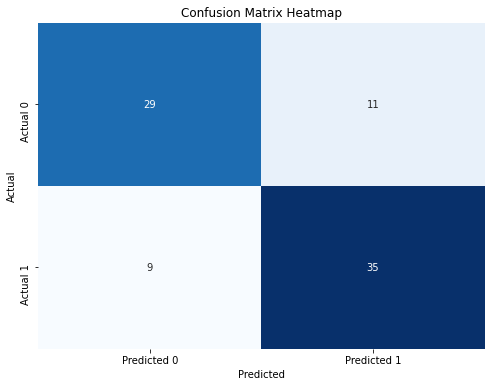

In [168]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusionM, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [169]:
# False Negative Estimate
FalseNegative = confusionM[1,0] / (confusionM[1,1] + confusionM[1,0])
FalseNegative

0.20454545454545456

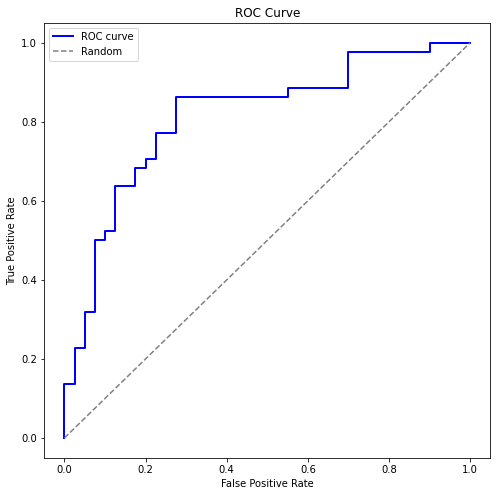

AUC: 0.8136363636363637


In [170]:
# ROC Curve
# Receiver Operating Characteristic
y_probs = mynet.predict(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plotting
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Calculate AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_probs)
print(f'AUC: {auc}')

## Random Forests: Leveraging Oversampling of Minority for Balanced Data
As the concluding machine learning technique in this study, Random Forests are implemented, specifically utilizing oversampling of the minority class to achieve a balanced dataset. This approach stems from the understanding that oversampling has shown more promising results compared to undersampling in previous models.

Random Forests, an ensemble learning method involving multiple decision trees, are particularly adept at handling complex and varied datasets. Their strength lies in aggregating results from numerous trees, thereby increasing the model's overall accuracy and robustness. This characteristic makes Random Forests well-suited for balanced datasets, where the challenge is to maintain accuracy while adequately representing minority cases.

In this phase, the primary objective is to assess the efficacy of Random Forests on a dataset where the minority class has been oversampled. This is in line with our goal to compare the best-performing models under similar conditions. By employing oversampling, we aim to mitigate the issue of class imbalance that has previously led to skewed predictions.

The performance of Random Forests on this balanced dataset will be critically analyzed and compared with the outcomes from the Naive Bayes and Neural Network models. This comparison aims to uncover the most effective technique for stroke prediction, considering the intricacies and demands of accurately predicting medical conditions.

In [181]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=123)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df_reduced_balanced.drop(columns=['Stroke']),  
    df_reduced_balanced['Stroke'],  
    test_size=0.1,
    random_state=123
)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
rf_predictions = rf_classifier.predict(X_test)

# Get predicted probabilities for both classes
rf_probabilities = rf_classifier.predict_proba(X_test)

# Set the new threshold
new_threshold = 0.2

custom_predictions = (rf_probabilities[:, 1] > new_threshold).astype(int)
print(rf_predictions)

[0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0
 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0
 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 0 1 1
 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1
 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1
 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0
 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0
 0 1 1 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 0
 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0
 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1
 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1
 0 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1
 0 0 0 1 1 0 1 1 0 0 1 0 

In [184]:
# Calculate accuracy on test data
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.997872340425532


In [185]:
# Calculate the confusion matrix
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)
print("Random Forest Confusion Matrix:")
print(rf_confusion_matrix)

Random Forest Confusion Matrix:
[[492   2]
 [  0 446]]


In [186]:
# Calculate False Negative Estimate
rf_false_negative = rf_confusion_matrix[1, 0] / (rf_confusion_matrix[1, 1] + rf_confusion_matrix[1, 0])
print("Random Forest False Negative Estimate:", rf_false_negative)

Random Forest False Negative Estimate: 0.0


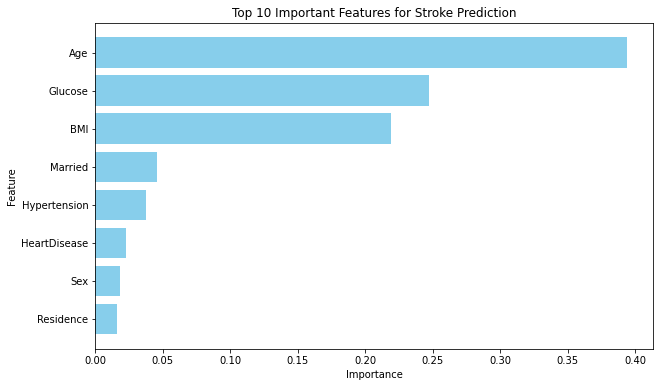

Top 10 Important Features:
        Feature  Importance
1           Age    0.393925
6       Glucose    0.247275
7           BMI    0.219362
4       Married    0.045825
2  Hypertension    0.037152
3  HeartDisease    0.022867
0           Sex    0.017860
5     Residence    0.015734


In [187]:
# Get feature importances from the trained model
feature_importances = rf_classifier.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Store feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top N important features
top_n = 10
top_features_df = feature_importance_df.head(top_n)

# Create a bar plot to visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_features_df['Feature'], top_features_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top {} Important Features for Stroke Prediction'.format(top_n))
plt.gca().invert_yaxis()  
plt.show()

# Display the top N important features in a table
print("Top {} Important Features:".format(top_n))
print(top_features_df)

## Efficacy of Random Forests in Stroke Prediction
The implementation of a Random Forest classifier in this study has yielded remarkable results, demonstrating the model's high efficacy in stroke prediction. With an accuracy score of 99.79%, the model has shown exceptional precision in classifying instances of stroke and non-stroke cases. Notably, the model achieved a 0% false negative rate, indicating its strong capability in correctly identifying all actual cases of stroke in the test dataset.

This high level of accuracy and the elimination of false negatives underscore the effectiveness of Random Forests in handling the complexities of medical prediction tasks. The use of 100 estimators and a custom threshold of 0.2 for stroke prediction further enhanced the model's precision, catering to the critical requirements of medical diagnosis where the cost of false negatives is particularly high.

The analysis of feature importance in stroke prediction revealed that Age, Glucose levels, and BMI are the top three contributing factors, aligning with medical insights into stroke risk. Age emerged as the most significant predictor, followed by Glucose and BMI, indicating their pivotal roles in the model's decision-making process. Other features like Marital Status, Hypertension, Heart Disease, Sex, and Residence also contributed to the model's predictions but to a lesser extent.

In comparison to the previously evaluated techniques (Naive Bayes and Neural Networks), the Random Forest classifier stands out for its high accuracy and the ability to completely avoid false negatives. This model's performance, particularly in terms of its feature importance analysis, provides valuable insights for healthcare professionals in identifying key risk factors for stroke prevention and management.

Overall, the Random Forest model, with its robust predictive accuracy and insightful feature importance analysis, represents a significant advancement in the field of stroke prediction. It offers a powerful tool for healthcare professionals in making informed decisions, ultimately contributing to better patient outcomes in stroke management.

## Conclusion: Identifying the Optimal Model for Stroke Prediction
After an extensive analysis utilizing various machine learning techniques, this project concludes that the Random Forest model stands out as the most effective approach for stroke prediction. Throughout the course of this study, models including Naive Bayes, Neural Networks, and Random Forests were rigorously evaluated, each with their distinct methodologies and balancing techniques such as oversampling and undersampling.

The Random Forest model, with its exceptional accuracy rate of 99.79% and a 0% false negative rate, demonstrates superior performance compared to its counterparts. Its ability to correctly identify all actual stroke cases in the test dataset without any false negatives is particularly noteworthy in the context of medical diagnostics, where the accuracy of predictions can have significant implications on patient outcomes.

A key strength of the Random Forest model is its robust handling of complex datasets, as evidenced by the detailed feature importance analysis. This analysis revealed that Age, Glucose levels, and BMI are the most significant predictors of stroke, providing valuable insights into the risk factors associated with this medical condition. The model's capacity to consider a range of attributes and their intricate interactions underlines its sophistication and reliability.

In comparison, while the Naive Bayes and Neural Networks models offered valuable perspectives and showed reasonable performance, they fell short in achieving the high level of accuracy and reliability demonstrated by the Random Forest model. The Neural Network, despite its advanced architecture, could not surpass the Random Forest in terms of overall accuracy and false negative rate.

The findings of this project underscore the importance of choosing the right machine learning model based on the specific characteristics of the dataset and the critical nature of the prediction task. In the case of stroke prediction, where accurate and early detection is paramount, the Random Forest model not only excels in predictive performance but also provides actionable insights through its feature importance analysis.

In conclusion, the Random Forest model emerges as the best-suited technique for stroke prediction, balancing high accuracy with a comprehensive understanding of key risk factors. Its application in healthcare settings holds the potential for significant improvements in stroke detection and prevention, ultimately contributing to better healthcare outcomes and patient care.

## References

 
[1] Fedesoriano. (2021, January 26). Stroke Prediction Dataset. Kaggle. https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?rvi=1. 

[2] Šamara, M. (2022, December 14). Machine Learning for Data Science [Lecture Notes].

[3] YouTube. (2011, July 14). Stroke | nucleus health. YouTube. https://www.youtube.com/watch?v=pcmrgwNCPwM&amp;t=191s.